### Honor Code
Jordan Martin K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

## Background:  Your client is a German bank, lending money to individuals.  
### They want to find out:
- ### The characteristics of the people who pay back
- ### The characteristics of the people who default on their loans.  
  
### Description of dataset: http://iainpardoe.com/teaching/dsc433/handouts/German.pdf

### Question 1: load bank.csv data

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
import matplotlib.font_manager
%matplotlib inline
import warnings
# Ignore deprecation warnings
warnings.filterwarnings('ignore')
# Reading in data
df=pd.read_csv("bank.csv")

### Question 2: Use your business knowledge to answer the first question. Which columns or (independent) variables would significantly influence the Y value (whether someone fulfills the terms of credit agreement or not)? List at least three and explain why?  
  
1. Employment would significantly influence a customer's ability to fulfill the terms of a credit agreement because if they are unemployed or jump around from job to job often, they won't have steady income to pay back the line of credit.
1. History would also significantly influence a customer's ability to fulfill the terms of a credit agreement because if they have delayed payment on other lines of credit, it is more likely they will struggle to fulfill the terms of this credit agreement.
1. Finally, guarantor would significantly influence a customer's ability to fulfill the terms of a credit agreement because if a customer has a guarantor, there is a much smaller chance that they won't fulfill the terms of the credit agreement as the guarantor would pay it back if they don't.

### Question 3: Please provide general findings from basic statistics (describe)

In [1]:
# Loop through each column in the dataframe
i = 0
for column in list(df):
    print("Column " + str(i + 2) + ":")
    # Get the statistic for the column
    statistic = df.groupby(column).size().reset_index()
    # Print the raw data how many people have each value in the column
    print(statistic)
    # If the statistic is binary, show pie charts
    if len(statistic.index) == 2 and list(df)[i] != "NUM_DEPENDENTS":
        if list(df)[i] != "RESPONSE":
            plt.pie(statistic[0], labels=["NOT_" + list(df)[i],list(df)[i]], autopct='%1.0f%%')
            plt.show()
        else:
            plt.pie(statistic[0], labels=["DIDNT_PAY_BACK", "PAID_BACK"], autopct='%1.0f%%')
            plt.show()
    
    # Otherwise, show bar charts for each
    else: plt.hist(df[column], label= column)
    plt.show()
    i = i + 1

NameError: name 'df' is not defined

### Results
- 2. Of those known, few people had more than 200 DM
- 3. Most loans had shorter durations (around 20 months or less)
- 4. Most borrowers had paid back all loans duly
- 5-10. 23% of borrowers borrowed for new cars, 10% for used cars, 18% for furniture, 28% for radios/tvs, 5% for education and 10% for retraining
- 11. Most lines of credit were for less than around 4000 DM
- 12. By far, most borrowers had no savings
- 13. A plurality of borrowers have worked at the same employer for 1 to 4 years
- 14. About half of borrowers have 4% of their disposable income as an installment rate
- 15-17. Most borrowers are single males, with 9% married or widowed men and 5% divored men
- 18-19. Only 4% have coapplicants and 5% have guarantors
- 20. 41% have lived at their residence more than 3 years, 15% 2-3 years, 31% 1-2 years and 13% less than 1 year
- 21-22. 28% own real estate and 15% own no property
- 23. Most borrowers are 20 to 40 years old with the largest share being 25-30.
- 24. 19% have other installment credit
- 25-26. 18% rent their residence and 71% own their residence
- 27. Most (63%) have one credit account, 33% have 2, 3% have 3 and 0.6% have 4.
- 28. 2% are unemployed, 20% are unskilled, 63% are skilled and 15% are highly or self employed
- 29. 85% have one dependent and 15% have two
- 30. 40% have a phone number in their name and 60% don't
- 31. 3.7% are foreign workers
- 32. 70% paid their loans back, 30% defaulted

### Question 4: What portion of borrowers have paid back? Please provide at least one plot (such as pie chart). 

([<matplotlib.patches.Wedge at 0x10fec9ef0>,
 [Text(0.646564,0.889919,'No'), Text(-0.646564,-0.889919,'Yes')],
 [Text(0.352671,0.48541,'30%'), Text(-0.352671,-0.48541,'70%')])

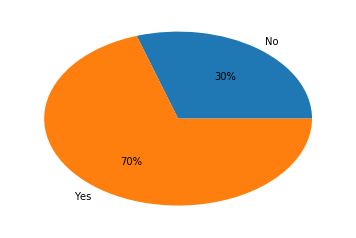

In [3]:
# Get the number of people who have and have not paid back their lines of credit
paid = df.groupby('RESPONSE').size().reset_index()
# Display the data in a pie chart with 0 corresponding to No and 1 corresponding to Yes as documentation suggests
plt.pie(paid[0], labels=["No","Yes"], autopct='%1.0f%%')

From this chart, it appears that 70% of borrowers ultimately paid back their loans and 30% did not.

### Question 5: Demonstrate your skills in groupby to extract business intelligence. The focus of your analysis should be who is likely to pay back/default on the loan. Provide a discussion of the findings in a markdown.

Column 2:
Paid Their Loan Back:
   CHK_ACCT    0
0         0  139
1         1  164
2         2   49
3         3  348
Didn't Pay Their Loan Back:
   CHK_ACCT    0
0         0  135
1         1  105
2         2   14
3         3   46


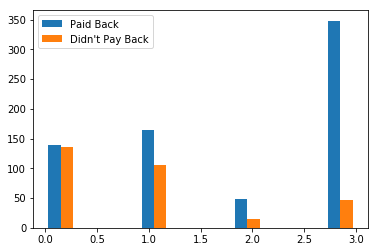

Column 3:
Paid Their Loan Back:
    DURATION    0
0          4    6
1          5    1
2          6   66
3          7    5
4          8    6
5          9   35
6         10   25
7         11    9
8         12  130
9         13    4
10        14    3
11        15   52
12        16    1
13        18   71
14        20    7
15        21   21
16        22    2
17        24  128
18        26    1
19        27    8
20        28    2
21        30   27
22        33    2
23        36   46
24        39    4
25        42    8
26        45    1
27        47    1
28        48   20
29        54    1
30        60    7
Didn't Pay Their Loan Back:
    DURATION   0
0          6   9
1          8   1
2          9  14
3         10   3
4         12  49
5         14   1
6         15  12
7         16   1
8         18  42
9         20   1
10        21   9
11        24  56
12        27   5
13        28   1
14        30  13
15        33   1
16        36  37
17        39   1
18        40   1
19        42   3
20     

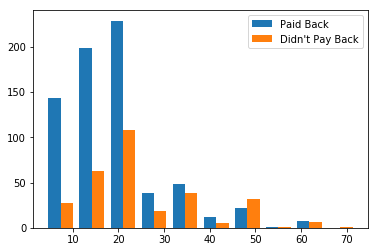

Column 4:
Paid Their Loan Back:
   HISTORY    0
0        0   15
1        1   21
2        2  361
3        3   60
4        4  243
Didn't Pay Their Loan Back:
   HISTORY    0
0        0   25
1        1   28
2        2  169
3        3   28
4        4   50


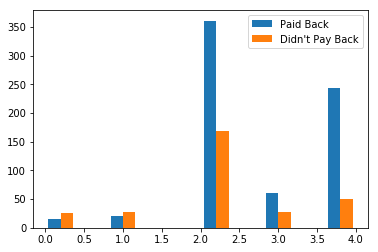

Column 5:
Paid Their Loan Back:
   NEW_CAR    0
0        0  555
1        1  145
Didn't Pay Their Loan Back:
   NEW_CAR    0
0        0  211
1        1   89


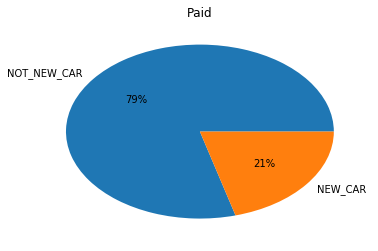

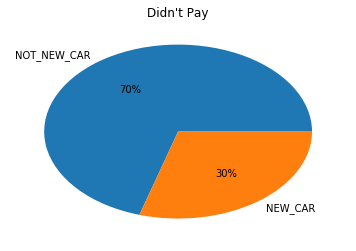

Column 6:
Paid Their Loan Back:
   USED_CAR    0
0         0  614
1         1   86
Didn't Pay Their Loan Back:
   USED_CAR    0
0         0  283
1         1   17


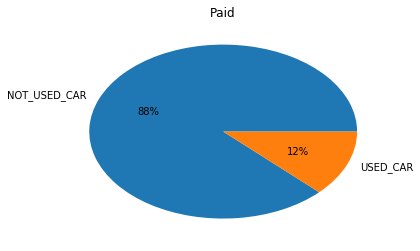

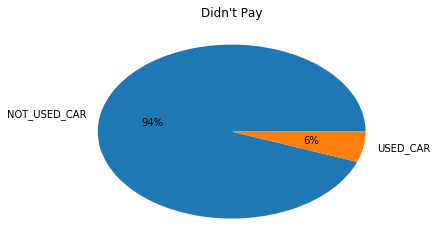

Column 7:
Paid Their Loan Back:
   FURNITURE    0
0          0  577
1          1  123
Didn't Pay Their Loan Back:
   FURNITURE    0
0          0  242
1          1   58


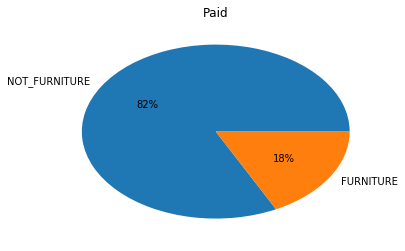

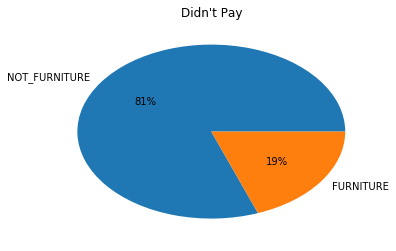

Column 8:
Paid Their Loan Back:
   RADIO/TV    0
0         0  482
1         1  218
Didn't Pay Their Loan Back:
   RADIO/TV    0
0         0  238
1         1   62


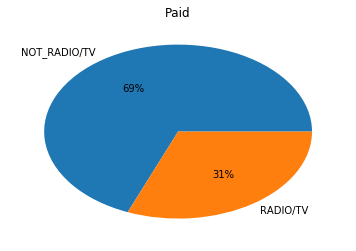

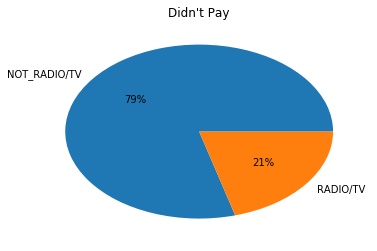

Column 9:
Paid Their Loan Back:
   EDUCATION    0
0          0  672
1          1   28
Didn't Pay Their Loan Back:
   EDUCATION    0
0          0  278
1          1   22


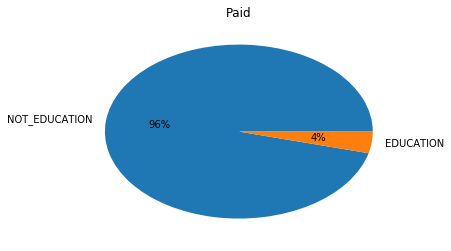

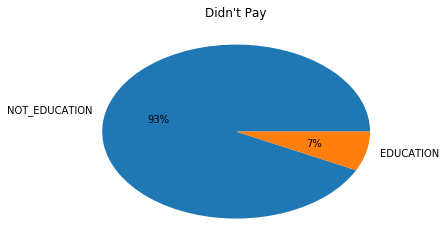

Column 10:
Paid Their Loan Back:
   RETRAINING    0
0           0  637
1           1   63
Didn't Pay Their Loan Back:
   RETRAINING    0
0           0  266
1           1   34


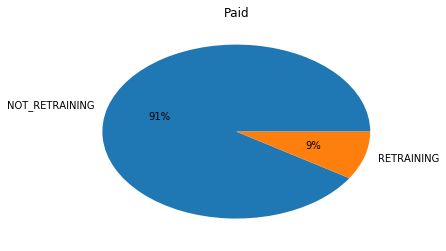

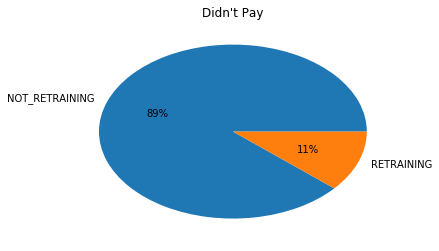

Column 11:
Paid Their Loan Back:
     AMOUNT  0
0       250  1
1       276  1
2       338  1
3       339  1
4       343  1
5       362  1
6       368  1
7       385  1
8       392  1
9       409  1
10      426  1
11      428  1
12      454  1
13      458  1
14      484  1
15      518  1
16      522  1
17      571  1
18      585  1
19      590  1
20      601  1
21      609  1
22      618  1
23      625  1
24      629  1
25      640  1
26      652  1
27      660  1
28      662  1
29      666  1
..      ... ..
625    8358  1
626    8471  1
627    8487  1
628    8588  1
629    8613  1
630    8858  1
631    8947  1
632    9055  1
633    9157  1
634    9277  1
635    9283  1
636    9436  1
637    9566  1
638    9857  1
639   10144  1
640   10222  1
641   10366  1
642   10477  1
643   10623  1
644   10722  1
645   10875  1
646   11054  1
647   11760  1
648   12169  1
649   12204  1
650   12749  1
651   13756  1
652   14179  1
653   15653  1
654   15857  1

[655 rows x 2 columns]
Didn't Pay Th

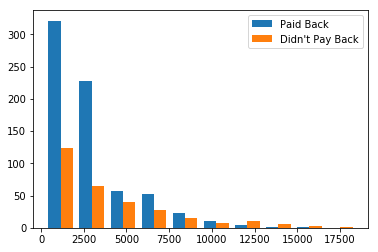

Column 12:
Paid Their Loan Back:
   SAV_ACCT    0
0         0  386
1         1   69
2         2   52
3         3   42
4         4  151
Didn't Pay Their Loan Back:
   SAV_ACCT    0
0         0  217
1         1   34
2         2   11
3         3    6
4         4   32


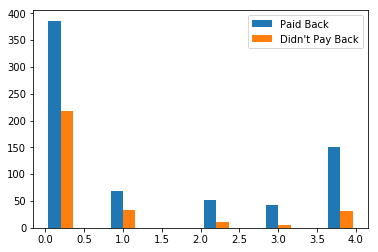

Column 13:
Paid Their Loan Back:
   EMPLOYMENT    0
0           0   39
1           1  102
2           2  235
3           3  135
4           4  189
Didn't Pay Their Loan Back:
   EMPLOYMENT    0
0           0   23
1           1   70
2           2  104
3           3   39
4           4   64


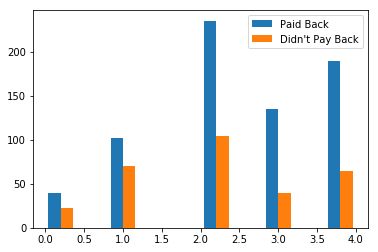

Column 14:
Paid Their Loan Back:
   INSTALL_RATE    0
0             1  102
1             2  169
2             3  112
3             4  317
Didn't Pay Their Loan Back:
   INSTALL_RATE    0
0             1   34
1             2   62
2             3   45
3             4  159


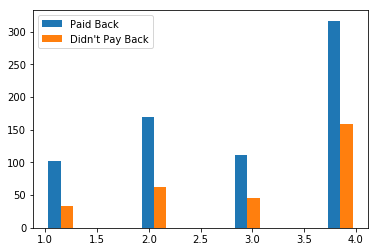

Column 15:
Paid Their Loan Back:
   MALE_DIV    0
0         0  670
1         1   30
Didn't Pay Their Loan Back:
   MALE_DIV    0
0         0  280
1         1   20


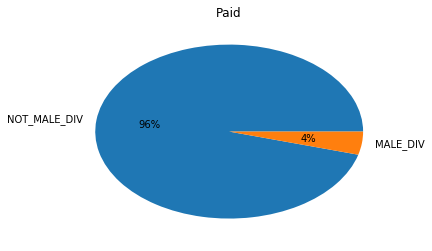

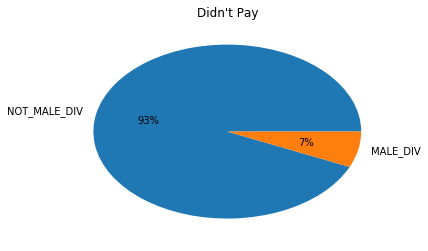

Column 16:
Paid Their Loan Back:
   MALE_SINGLE    0
0            0  298
1            1  402
Didn't Pay Their Loan Back:
   MALE_SINGLE    0
0            0  154
1            1  146


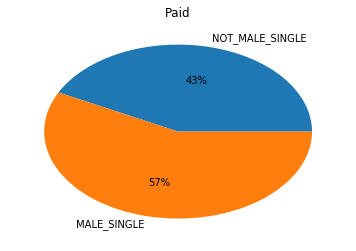

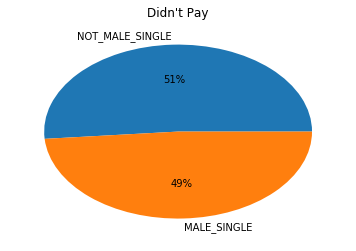

Column 17:
Paid Their Loan Back:
   MALE_MAR_or_WID    0
0                0  633
1                1   67
Didn't Pay Their Loan Back:
   MALE_MAR_or_WID    0
0                0  275
1                1   25


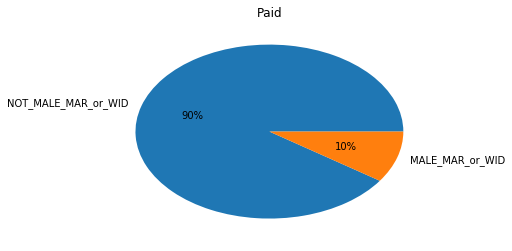

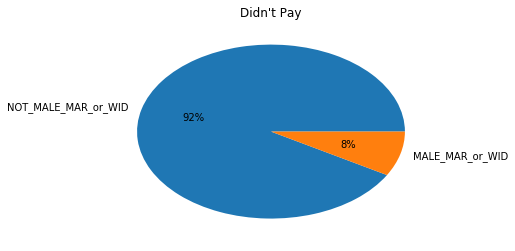

Column 18:
Paid Their Loan Back:
   CO-APPLICANT    0
0             0  677
1             1   23
Didn't Pay Their Loan Back:
   CO-APPLICANT    0
0             0  282
1             1   18


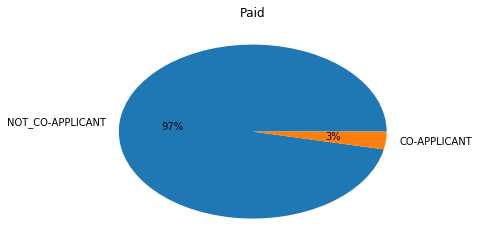

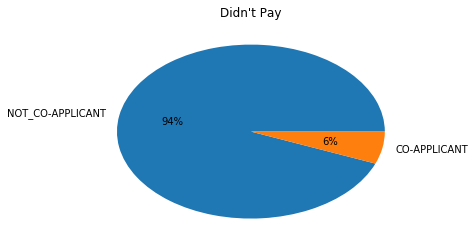

Column 19:
Paid Their Loan Back:
   GUARANTOR    0
0          0  658
1          1   42
Didn't Pay Their Loan Back:
   GUARANTOR    0
0          0  290
1          1   10


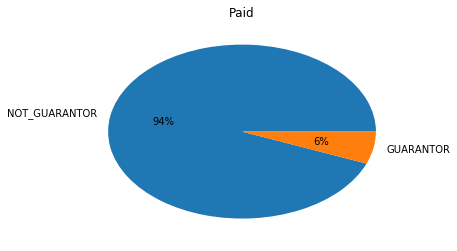

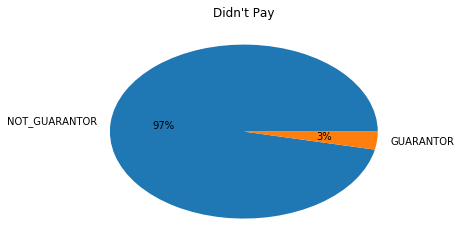

Column 20:
Paid Their Loan Back:
   PRESENT_RESIDENT    0
0                 1   94
1                 2  211
2                 3  106
3                 4  289
Didn't Pay Their Loan Back:
   PRESENT_RESIDENT    0
0                 1   36
1                 2   97
2                 3   43
3                 4  124


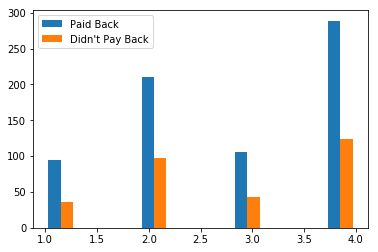

Column 21:
Paid Their Loan Back:
   REAL_ESTATE    0
0            0  478
1            1  222
Didn't Pay Their Loan Back:
   REAL_ESTATE    0
0            0  240
1            1   60


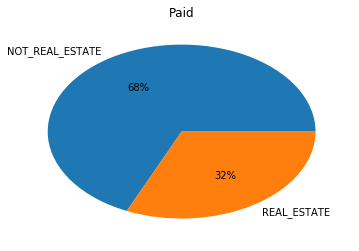

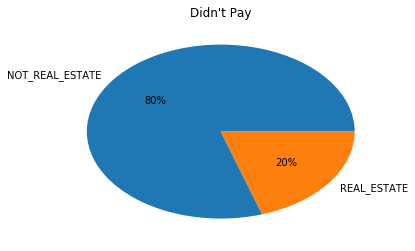

Column 22:
Paid Their Loan Back:
   PROP_UNKN_NONE    0
0               0  613
1               1   87
Didn't Pay Their Loan Back:
   PROP_UNKN_NONE    0
0               0  233
1               1   67


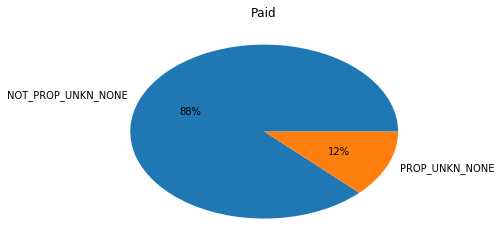

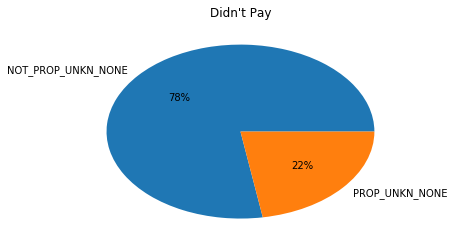

Column 23:
Paid Their Loan Back:
    AGE   0
0    19   1
1    20   9
2    21   9
3    22  16
4    23  28
5    24  25
6    25  22
7    26  36
8    27  38
9    28  28
10   29  22
11   30  29
12   31  27
13   32  25
14   33  20
15   34  21
16   35  34
17   36  33
18   37  21
19   38  20
20   39  15
21   40  19
22   41  13
23   42  14
24   43  12
25   44  12
26   45  12
27   46  14
28   47  12
29   48   9
30   49  13
31   50   9
32   51   7
33   52   8
34   53   2
35   54   8
36   55   5
37   56   3
38   57   6
39   58   3
40   59   2
41   60   3
42   61   4
43   62   2
44   63   7
45   64   5
46   65   4
47   66   3
48   67   3
49   68   1
50   70   1
51   74   3
52   75   2
Didn't Pay Their Loan Back:
    AGE   0
0    19   1
1    20   5
2    21   5
3    22  11
4    23  20
5    24  19
6    25  19
7    26  14
8    27  13
9    28  15
10   29  15
11   30  11
12   31  11
13   32   9
14   33  13
15   34  11
16   35   6
17   36   6
18   37   8
19   38   4
20   39   6
21   40   6
22   41   4
23 

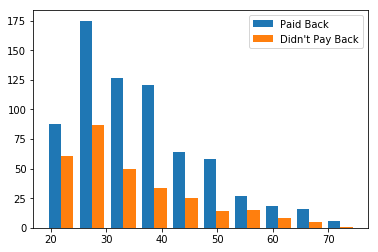

Column 24:
Paid Their Loan Back:
   OTHER_INSTALL    0
0              0  590
1              1  110
Didn't Pay Their Loan Back:
   OTHER_INSTALL    0
0              0  224
1              1   76


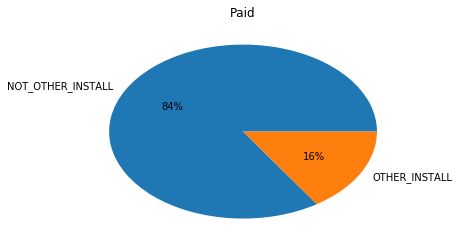

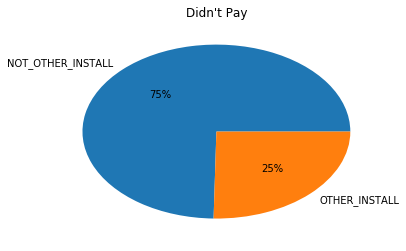

Column 25:
Paid Their Loan Back:
   RENT    0
0     0  591
1     1  109
Didn't Pay Their Loan Back:
   RENT    0
0     0  230
1     1   70


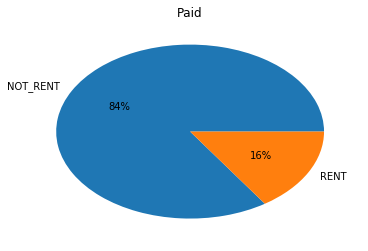

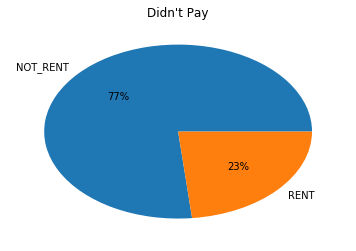

Column 26:
Paid Their Loan Back:
   OWN_RES    0
0        0  173
1        1  527
Didn't Pay Their Loan Back:
   OWN_RES    0
0        0  114
1        1  186


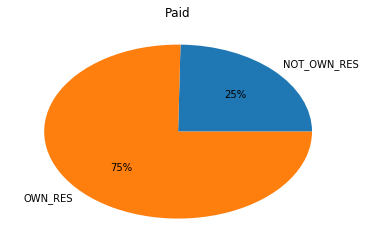

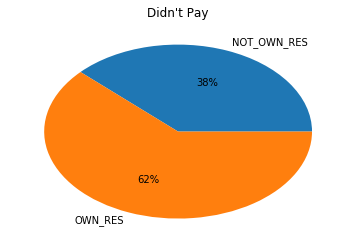

Column 27:
Paid Their Loan Back:
   NUM_CREDITS    0
0            1  433
1            2  241
2            3   22
3            4    4
Didn't Pay Their Loan Back:
   NUM_CREDITS    0
0            1  200
1            2   92
2            3    6
3            4    2


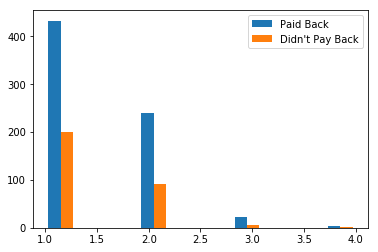

Column 28:
Paid Their Loan Back:
   JOB    0
0    0   15
1    1  144
2    2  444
3    3   97
Didn't Pay Their Loan Back:
   JOB    0
0    0    7
1    1   56
2    2  186
3    3   51


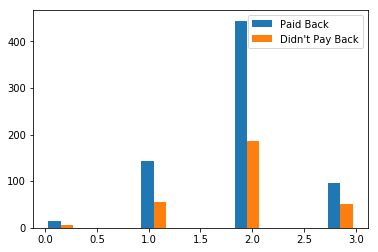

Column 29:
Paid Their Loan Back:
   NUM_DEPENDENTS    0
0               1  591
1               2  109
Didn't Pay Their Loan Back:
   NUM_DEPENDENTS    0
0               1  254
1               2   46


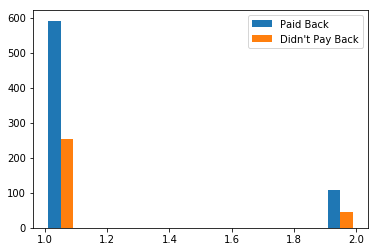

Column 30:
Paid Their Loan Back:
   TELEPHONE    0
0          0  409
1          1  291
Didn't Pay Their Loan Back:
   TELEPHONE    0
0          0  187
1          1  113


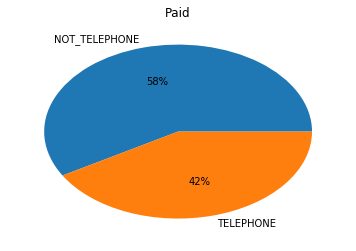

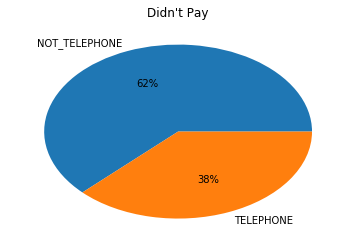

Column 31:
Paid Their Loan Back:
   FOREIGN    0
0        0  667
1        1   33
Didn't Pay Their Loan Back:
   FOREIGN    0
0        0  296
1        1    4


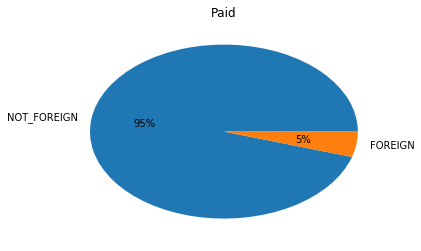

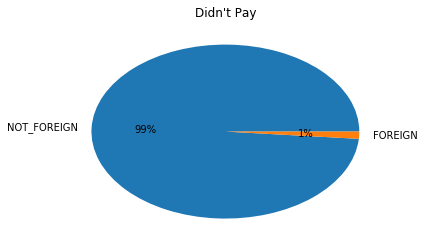

In [4]:
# Get a dataframe of all of the people that paid their loans off
paidBack = df.loc[df['RESPONSE'] == 1]
# Get a dataframe of all of the people that didn't pay their loans off
didntPayBack = df.loc[df['RESPONSE'] == 0]
for i in range(30):
    print("Column " + str(i + 2) + ":")
    # Get the statistic for the column
    statisticPaid = paidBack.groupby(list(paidBack)[i]).size().reset_index()
    statisticUnpaid = didntPayBack.groupby(list(paidBack)[i]).size().reset_index()
    # Print the raw data how many people have each value in the column
    print("Paid Their Loan Back:")
    print(statisticPaid)
    print("Didn't Pay Their Loan Back:")
    print(statisticUnpaid)
    # Show bar charts for each
    # If the statistic is binary, show two pie charts
    if max(len(statisticUnpaid.index), len(statisticPaid.index)) == 2 and list(df)[i] != "NUM_DEPENDENTS":
        plt.pie(statisticPaid[0], labels=["NOT_" + list(paidBack)[i],list(paidBack)[i]], autopct='%1.0f%%')
        plt.title("Paid")
        plt.show()
        plt.pie(statisticUnpaid[0], labels=["NOT_" + list(didntPayBack)[i],list(didntPayBack)[i]], autopct='%1.0f%%')
        plt.title("Didn't Pay")
        plt.show()
    # Otherwise, show one histogram
    else:
        plt.hist([paidBack[list(paidBack)[i]],didntPayBack[list(didntPayBack)[i]]],label=["Paid Back","Didn't Pay Back"])
        plt.legend()
        plt.show()

## In the above code, I separated customers that paid their loans back and those that didn't. I then did the same analysis on each of the columns that I did in Question 3. Below are the most obvious datapoints that seem to determine whether customers will pay their loans back or not.
### Potential data points that seem to cause customers to be more likely to not pay back their loans:
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Having no previous credit or paying off all credit (which is counterintuitive)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Using loan for education
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Large loan amounts (i.e. more than 10000 DM)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Being 25 years old and younger
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Having a coapplicant (which is counterintuitive)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Being male and divorced
### Potential data points that seem to cause customers to be more likely to pay back their loans:
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Using loan for used car
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Small loan amounts (i.e. less than 2500 DM)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Having more than 1000 DM in savings
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Having a gurantor
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Being a foreign worker

### Question 6: Formulate your own question relevant to this dataset and business problem and answer using data visualization. 

### My Question: What age group is most likely to not pay back their loans (19-25, 26-30, 31-35, 36-40, 41-45, 46-50, 51-55, 56-60, 61-65 or 66+)?

In [5]:
# Empty arrays to start
agesPaid = [0] * 10
agesDidntPay = [0] * 10
percentPaid = [0] * 10
ageGroups = ["19-25","26-30","31-25","36-40","41-45","46-50","51-55","56-60","61-65","66+  "]
for index, row in df.iterrows():
    # If they paid off their loan, add one to didntPay for their age group
    if row["RESPONSE"] == 0:
        if   row["AGE"] < 26:
            agesDidntPay[0] = agesDidntPay[0] + 1
        elif row["AGE"] < 31:
            agesDidntPay[1] = agesDidntPay[1] + 1
        elif row["AGE"] < 36:
            agesDidntPay[2] = agesDidntPay[2] + 1
        elif row["AGE"] < 41:
            agesDidntPay[3] = agesDidntPay[3] + 1
        elif row["AGE"] < 46:
            agesDidntPay[4] = agesDidntPay[4] + 1
        elif row["AGE"] < 51:
            agesDidntPay[5] = agesDidntPay[5] + 1
        elif row["AGE"] < 56:
            agesDidntPay[6] = agesDidntPay[6] + 1
        elif row["AGE"] < 61:
            agesDidntPay[7] = agesDidntPay[7] + 1
        elif row["AGE"] < 66:
            agesDidntPay[8] = agesDidntPay[8] + 1
        else:
            agesDidntPay[9] = agesDidntPay[9] + 1
    # If they paid off their loan, add one to paid for their age group
    else:
        if   row["AGE"] < 26:
            agesPaid[0] = agesPaid[0] + 1
        elif row["AGE"] < 31:
            agesPaid[1] = agesPaid[1] + 1
        elif row["AGE"] < 36:
            agesPaid[2] = agesPaid[2] + 1
        elif row["AGE"] < 41:
            agesPaid[3] = agesPaid[3] + 1
        elif row["AGE"] < 46:
            agesPaid[4] = agesPaid[4] + 1
        elif row["AGE"] < 51:
            agesPaid[5] = agesPaid[5] + 1
        elif row["AGE"] < 56:
            agesPaid[6] = agesPaid[6] + 1
        elif row["AGE"] < 61:
            agesPaid[7] = agesPaid[7] + 1
        elif row["AGE"] < 66:
            agesPaid[8] = agesPaid[8] + 1
        else:
            agesPaid[9] = agesPaid[9] + 1
# Print the pay back rates for each age group
for i in range(10):
    percentPaid[i] = agesPaid[i] / (agesPaid[i] + agesDidntPay[i])
    print("Age groups {:} paid back their loans at a rate of {:2.2%}".format(ageGroups[i], percentPaid[i]))


Age groups 19-25 paid back their loans at a rate of 57.89%
Age groups 26-30 paid back their loans at a rate of 69.23%
Age groups 31-25 paid back their loans at a rate of 71.75%
Age groups 36-40 paid back their loans at a rate of 78.26%
Age groups 41-45 paid back their loans at a rate of 71.59%
Age groups 46-50 paid back their loans at a rate of 78.08%
Age groups 51-55 paid back their loans at a rate of 71.43%
Age groups 56-60 paid back their loans at a rate of 65.38%
Age groups 61-65 paid back their loans at a rate of 81.48%
Age groups 66+   paid back their loans at a rate of 72.22%


From this, we see that ages 19-25 pay back their loans at the lowest rate (57.89%).

### Question 7: What are the characteristics of the people who have defaulted on loans? Provide your findings.

In [6]:
for i in range(30):
    # Get the statistic for the column
    statisticUnpaid = didntPayBack.groupby(list(paidBack)[i]).size().reset_index()
    print(list(didntPayBack)[i])
    if i in [1, 9, 12, 21, 25, 27]:
        print("Mean Value: " + str(statisticUnpaid.mean()[list(didntPayBack)[i]]))
    else:
        print("Mode Value: " + str(statisticUnpaid.idxmax()[0]))

CHK_ACCT
Mode Value: 0
DURATION
Mean Value: 29.08
HISTORY
Mode Value: 2
NEW_CAR
Mode Value: 0
USED_CAR
Mode Value: 0
FURNITURE
Mode Value: 0
RADIO/TV
Mode Value: 0
EDUCATION
Mode Value: 0
RETRAINING
Mode Value: 0
AMOUNT
Mean Value: 3985.295918367347
SAV_ACCT
Mode Value: 0
EMPLOYMENT
Mode Value: 2
INSTALL_RATE
Mean Value: 2.5
MALE_DIV
Mode Value: 0
MALE_SINGLE
Mode Value: 0
MALE_MAR_or_WID
Mode Value: 0
CO-APPLICANT
Mode Value: 0
GUARANTOR
Mode Value: 0
PRESENT_RESIDENT
Mode Value: 3
REAL_ESTATE
Mode Value: 0
PROP_UNKN_NONE
Mode Value: 0
AGE
Mean Value: 42.5531914893617
OTHER_INSTALL
Mode Value: 0
RENT
Mode Value: 0
OWN_RES
Mode Value: 1
NUM_CREDITS
Mean Value: 2.5
JOB
Mode Value: 2
NUM_DEPENDENTS
Mean Value: 1.5
TELEPHONE
Mode Value: 0
FOREIGN
Mode Value: 0


### For columns that are binary or categorical, I picked the mode values as they are the most common. For numerical values, I picked the mean value as it should be the average amount. My results are in the above output. Their explanations are below:
- 0 DM in checking account
- 29 months long
- Existing credits paid back duly until now
- While none of the indivual loan reasons were majorities, from before we saw New Car was the mode
- Credit amount of 3985 DM
- No savings
- Between 1 and 4 years in the current job
- Installment rate of 2.5% of income
- While none of the male subcategories were majorities, from before we saw that single males were the mode
- No co-applicant or gurantor
- At president residence for 2 to 3 years
- No real estate or property owned
- No other installment loans
- Own residence, don't rent
- 2.5 other credit accounts
- Skilled worker
- 1.5 dependents
- Doesn't own their own telephone
- Not a foreign worker